### Libraries

In [26]:
library( MASS )
library( caret )
library( tree )
library( rpart )

### Data

In [2]:
df <- read.csv( 'hotelloyaltydata.csv' )

In [3]:
str( df )

'data.frame':	2276 obs. of  12 variables:
 $ Customer.Key     : int  1193 699 2491 2107 308 2882 3079 1999 272 1723 ...
 $ First.Name       : Factor w/ 925 levels "A","AARYN","ABBASHER",..: 219 902 543 22 704 186 907 650 108 329 ...
 $ Last.Name        : Factor w/ 1790 levels "ABDELKADER","ABDELLA",..: 1205 478 1710 981 1701 463 55 928 1056 1436 ...
 $ Customer.Segment : Factor w/ 20 levels "A","B","C","D",..: 3 4 17 10 6 12 17 15 3 20 ...
 $ Income           : Factor w/ 13 levels "A","B","C","D",..: 8 9 4 1 1 5 2 5 9 13 ...
 $ Reedemer         : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 2 2 ...
 $ Region           : int  1 1 10 5 1 7 10 10 6 4 ...
 $ Spend            : num  26573 36711 46008 68501 75182 ...
 $ Status           : Factor w/ 4 levels "Bronze","Gold",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Stays.Per.Year   : int  8 2 2 2 3 2 8 7 4 1 ...
 $ Total.Days.Stayed: int  6 23 6 12 14 9 66 12 12 1 ...
 $ Years.Of.Loyalty : num  0.75 11.25 2.75 6 4.75 ...


In [4]:
set.seed( 1 )

In [5]:
train <- createDataPartition( df$Reedemer, 1, p = 0.7, list = FALSE )

In [6]:
df.train <- df[train,]

In [31]:
df.test <- df[-train,]

### Logistic regression model

In [7]:
fit.glm <- glm( Reedemer
       ~ Spend
       + Status
       + Stays.Per.Year
       + Total.Days.Stayed
       + Years.Of.Loyalty
#        + factor( Region )
#        + Customer.Segment
#        + Income
       , data = df.train
       , family = binomial( link = logit ) )

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [8]:
summary( fit.glm )


Call:
glm(formula = Reedemer ~ Spend + Status + Stays.Per.Year + Total.Days.Stayed + 
    Years.Of.Loyalty, family = binomial(link = logit), data = df.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.8874  -0.2955  -0.0448  -0.0012   3.4899  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -0.9729221  0.3267808  -2.977  0.00291 ** 
Spend              0.0007466  0.0000613  12.178  < 2e-16 ***
StatusGold         0.7195858  0.3125854   2.302  0.02133 *  
StatusPlatinum     0.4084301  0.8625452   0.474  0.63584    
StatusSilver       0.6569320  0.2919656   2.250  0.02445 *  
Stays.Per.Year    -1.4849591  0.1624513  -9.141  < 2e-16 ***
Total.Days.Stayed -0.0663429  0.0385267  -1.722  0.08507 .  
Years.Of.Loyalty   0.0937064  0.0742992   1.261  0.20724    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1401.88  on 1594  

In [ ]:
# rsq( fit.glm )

### Perform stepwise selection of variables

In [9]:
fit.glm <- glm( Reedemer
       ~ Spend
       + Status
       + Stays.Per.Year
       + Total.Days.Stayed
       + Years.Of.Loyalty
       + factor( Region )
       + Customer.Segment
       + Income
       , data = df.train
       , family = binomial( link = logit ) )

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [12]:
step <- stepAIC( fit.glm, direction = 'both' )

Start:  AIC=636.46
Reedemer ~ Spend + Status + Stays.Per.Year + Total.Days.Stayed + 
    Years.Of.Loyalty + factor(Region) + Customer.Segment + Income



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                    Df Deviance    AIC
- Customer.Segment  18   549.19 607.19
- Income            11   546.92 618.92
<none>                   542.46 636.46
- Status             3   548.83 636.83
- Years.Of.Loyalty   1   544.85 636.85
- Total.Days.Stayed  1   547.31 639.31
- factor(Region)     9   568.40 644.40
- Stays.Per.Year     1   710.34 802.34
- Spend              1   879.92 971.92


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=607.19
Reedemer ~ Spend + Status + Stays.Per.Year + Total.Days.Stayed + 
    Years.Of.Loyalty + factor(Region) + Income



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                    Df Deviance    AIC
- Income            12   555.64 589.64
- Years.Of.Loyalty   1   550.89 606.89
<none>                   549.19 607.19
- Status             3   555.52 607.52
- Total.Days.Stayed  1   553.56 609.56
- factor(Region)     9   575.85 615.85
+ Customer.Segment  18   542.46 636.46
- Stays.Per.Year     1   721.95 777.95
- Spend              1   892.33 948.33


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=589.64
Reedemer ~ Spend + Status + Stays.Per.Year + Total.Days.Stayed + 
    Years.Of.Loyalty + factor(Region)



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                    Df Deviance    AIC
- Years.Of.Loyalty   1   557.30 589.30
<none>                   555.64 589.64
- Status             3   562.02 590.02
- Total.Days.Stayed  1   559.17 591.17
- factor(Region)     9   583.14 599.14
+ Income            12   549.19 607.19
+ Customer.Segment  19   546.92 618.92
- Stays.Per.Year     1   735.15 767.15
- Spend              1   908.36 940.36


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=589.3
Reedemer ~ Spend + Status + Stays.Per.Year + Total.Days.Stayed + 
    factor(Region)



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                    Df Deviance    AIC
<none>                   557.30 589.30
- Total.Days.Stayed  1   559.37 589.37
- Status             3   563.49 589.49
+ Years.Of.Loyalty   1   555.64 589.64
- factor(Region)     9   584.75 598.75
+ Income            12   550.89 606.89
+ Customer.Segment  19   548.86 618.86
- Stays.Per.Year     1   883.44 913.44
- Spend              1   908.42 938.42


In [13]:
step$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,1548,542.4578,636.4578
- Customer.Segment,18,6.736616,1566,549.1944,607.1944
- Income,12,6.449180,1578,555.6436,589.6436
- Years.Of.Loyalty,1,1.653244,1579,557.2968,589.2968


### Regression tree model

In [28]:
fit.tree <- rpart( Reedemer 
     ~ Spend
       + Status
       + Stays.Per.Year
       + Total.Days.Stayed
       + Years.Of.Loyalty
       + factor( Region )
       + Customer.Segment
       + Income
     , data = df.train )

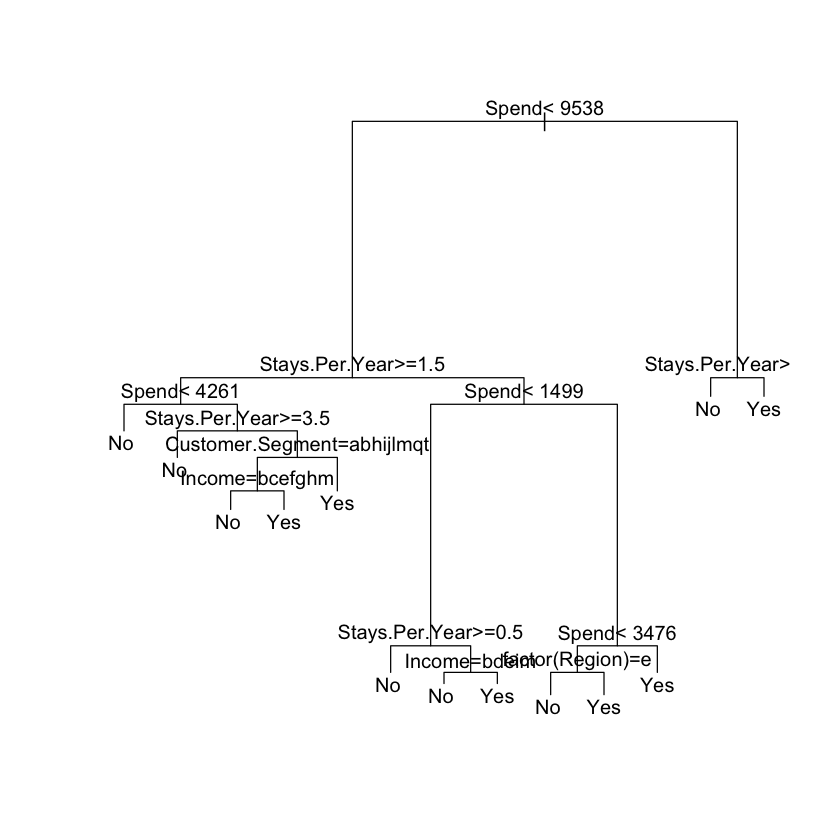

In [29]:
plot( fit.tree ); text( fit.tree)

In [37]:
df.test$predict <- predict( fit.tree, newdata = df.test )

In [30]:
printcp( fit.tree )


Classification tree:
rpart(formula = Reedemer ~ Spend + Status + Stays.Per.Year + 
    Total.Days.Stayed + Years.Of.Loyalty + factor(Region) + Customer.Segment + 
    Income, data = df.train)

Variables actually used in tree construction:
[1] Customer.Segment factor(Region)   Income           Spend           
[5] Stays.Per.Year  

Root node error: 255/1595 = 0.15987

n= 1595 

        CP nsplit rel error  xerror     xstd
1 0.270588      0   1.00000 1.00000 0.057399
2 0.127451      1   0.72941 0.73725 0.050502
3 0.023529      3   0.47451 0.50980 0.042852
4 0.019608      4   0.45098 0.54118 0.044030
5 0.018301      5   0.43137 0.53725 0.043885
6 0.011765      9   0.35686 0.49804 0.042398
7 0.010000     12   0.32157 0.47059 0.041311


In [39]:
confusionMatrix( df.test$Reedemer )

ERROR: Error in confusionMatrix.default(df.test$Reedemer, df.test$predict[[1]]): the data cannot have more levels than the reference
